In [ ]:
# prompt: generate libraries for sentiment analysis

!pip install transformers
!pip install sentencepiece
!pip install nltk
!python -m nltk.downloader punkt
!pip install pandas
!pip install pyLDAvis
!pip install pyLDAvis.sklearn


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pyLDAvis.sklearn (from versions: none)
ERROR: No matching distribution found for pyLDAvis.sklearn


In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 28.3 MB/s eta 0:00:00
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.1.1
    Uninstalling google-auth-httplib2-0.1.1:
      Successfully uninstalled google-auth-httplib2-0.1.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0


In [2]:
df = pd.read_csv("/content/VillaMonticelloBoutiqueHotel.csv")
df.head()

,Review Id,User ID,Display Name,User Name,User Profile,User Avatar,User Location,User Is Verified,Rating,Additional Ratings,Review Title,Review Text,Helpful Votes,Photos,Stay Date,Created Date,Published Date,Language,Location
0,957040930,F188E12D3CEA4471C5E6DE5645861761,Samuel C,samuelcM1701CE,https://www.tripadvisor.co.uk/Profile/samuelcM...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,Lovely Hotel,"Very nice ambience, professional staff and fri...",1,NaN,30/06/2024,28/06/2024,28/06/2024,en,Villa Monticello Boutique Hotel
1,957039870,216137DB6B23461BB80A17E26F01B1C7,Ibadanboy,Ibadanboy,https://www.tripadvisor.co.uk/Profile/Ibadanboy,https://media-cdn.tripadvisor.com/media/photo-...,Nairobi,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,Wonderful 3 nights stay,I had a wonderful 3 nights stay. It’s a beauti...,1,NaN,30/06/2024,28/06/2024,28/06/2024,en,Villa Monticello Boutique Hotel
2,956508014,9B2A4BC6DD34ABD858C09F2973F03008,Ama B,66amab,https://www.tripadvisor.co.uk/Profile/66amab,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,4,NaN,Great ambience,Great ambience and service. It was my second t...,1,NaN,30/06/2024,24/06/2024,24/06/2024,en,Villa Monticello Boutique Hotel
3,956150218,4DD445D674EA28CFAC3BE4A1A4E7F287,Jill S,jillsU5403RV,https://www.tripadvisor.co.uk/Profile/jillsU54...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,NaN,Solid boutique hotel!,Incredible service! Accommodating and pleasant...,1,https://media-cdn.tripadvisor.com/media/photo-...,30/06/2024,22/06/2024,21/06/2024,en,Villa Monticello Boutique Hotel
4,955083525,BF32015BCA3701D0CDA54F8DD6E8DDAD,abdoulaye s,abdoulayes135,https://www.tripadvisor.co.uk/Profile/abdoulay...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,Wanderful Stay,I’m very happy staying with Villa Monticello. ...,1,NaN,30/06/2024,14/06/2024,14/06/2024,en,Villa Monticello Boutique Hotel


In [3]:
df.columns

Index(['Review Id', 'User ID', 'Display Name', 'User Name', 'User Profile',
       'User Avatar', 'User Location', 'User Is Verified', 'Rating',
       'Additional Ratings', 'Review Title', 'Review Text', 'Helpful Votes',
       'Photos', 'Stay Date', 'Created Date', 'Published Date', 'Language',
       'Location'],
      dtype='object')

In [5]:
df['Review Text'].nunique()

275

In [6]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
#### Now creating some functions to do text processing
# Removing hashtags and mentions
def get_hashtags(text):
    hashtags = re.findall(r'\#\w+',text.lower())
    return hashtags
def get_mentions(text):
    mentions = re.findall(r'\@\w+',text.lower())
    return mentions

# Cleaning up the text of the tweets
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text

def process_tweet(tweet):
    """
    tweets cleaning by
    1) lowering the case of the tweet,
    2) removing unwanted symbols and replacing them with a whitespace,
    3) split sentences into words according to whitespaces and then
    4) join back with a single whitespace as separator between various words
    """
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

def process_text(text, stem=False): #clean text
    text=remove_content(text)
    lemmatizer=WordNetLemmatizer()
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic
    text = re.sub(r"\bamp\b", ' ', text.lower()) #remove "amp" which is coming from the translation of &
    text = re.sub(r"\bco\b", ' ', text.lower()) #remove "co" which was one of the top words found below
    tokenized_text = word_tokenize(text) #tokenize
    #tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
    clean_text = [
         word for word in tokenized_text
         if (word not in stop_words and len(word)>1)
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    clean_text = [lemmatizer.lemmatize(word) for word in clean_text]
    return ' '.join(clean_text)

#functions used to remove search terms from all the tweets
#function to remove duplicates from a string - in this case the string is the keywords used to scrape the tweets
def removeDupWithoutOrder(string):
    words = string.lower().split()
    return " ".join(sorted(set(words), key=words.index)).replace('OR', '').replace('  ', ' ')

#function to search for string i.e. remove specific words (search_terms in this case)
def remove_search(text, search_terms):
    query = text.lower()
    querywords = query.split()
    resultwords  = [word for word in querywords if word.lower() not in search_terms]
    return ' '.join(resultwords)

# define function to plot frequency of bi-grams, tri-grams, single words, phrases etc
from sklearn.feature_extraction.text import CountVectorizer
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')

In [9]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [10]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [12]:
# removing useless content (hashtags, mentions)
df['Comment']=df['Review Text'].apply(str)

In [13]:
# Several functions applied here: processing the comments to remove punctuation, hashtags, mentions

df['cleaned_comments']=df['Comment'].apply(lambda x: process_tweet(x))

In [14]:
df

,Review Id,User ID,Display Name,User Name,User Profile,User Avatar,User Location,User Is Verified,Rating,Additional Ratings,...,Review Text,Helpful Votes,Photos,Stay Date,Created Date,Published Date,Language,Location,Comment,cleaned_comments
0,957040930,F188E12D3CEA4471C5E6DE5645861761,Samuel C,samuelcM1701CE,https://www.tripadvisor.co.uk/Profile/samuelcM...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,"Very nice ambience, professional staff and fri...",1,NaN,30/06/2024,28/06/2024,28/06/2024,en,Villa Monticello Boutique Hotel,"Very nice ambience, professional staff and fri...",very nice ambience professional staff and frie...
1,957039870,216137DB6B23461BB80A17E26F01B1C7,Ibadanboy,Ibadanboy,https://www.tripadvisor.co.uk/Profile/Ibadanboy,https://media-cdn.tripadvisor.com/media/photo-...,Nairobi,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,I had a wonderful 3 nights stay. It’s a beauti...,1,NaN,30/06/2024,28/06/2024,28/06/2024,en,Villa Monticello Boutique Hotel,I had a wonderful 3 nights stay. It’s a beauti...,i had a wonderful 3 nights stay it s a beautif...
2,956508014,9B2A4BC6DD34ABD858C09F2973F03008,Ama B,66amab,https://www.tripadvisor.co.uk/Profile/66amab,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,4,NaN,...,Great ambience and service. It was my second t...,1,NaN,30/06/2024,24/06/2024,24/06/2024,en,Villa Monticello Boutique Hotel,Great ambience and service. It was my second t...,great ambience and service it was my second ti...
3,956150218,4DD445D674EA28CFAC3BE4A1A4E7F287,Jill S,jillsU5403RV,https://www.tripadvisor.co.uk/Profile/jillsU54...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,NaN,...,Incredible service! Accommodating and pleasant...,1,https://media-cdn.tripadvisor.com/media/photo-...,30/06/2024,22/06/2024,21/06/2024,en,Villa Monticello Boutique Hotel,Incredible service! Accommodating and pleasant...,incredible service accommodating and pleasant ...
4,955083525,BF32015BCA3701D0CDA54F8DD6E8DDAD,abdoulaye s,abdoulayes135,https://www.tripadvisor.co.uk/Profile/abdoulay...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,I’m very happy staying with Villa Monticello. ...,1,NaN,30/06/2024,14/06/2024,14/06/2024,en,Villa Monticello Boutique Hotel,I’m very happy staying with Villa Monticello. ...,i m very happy staying with villa monticello i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,115033213,E1EF9CE2091448F6B22654555E5B45BC,Business_Traveler771,Business_Traveler771,https://www.tripadvisor.co.uk/Profile/Business...,https://media-cdn.tripadvisor.com/media/photo-...,New York City,No,5,Value:5\nCleanliness:5\nService:5\nSleep Quali...,...,This was an incredible find in Accra. This is...,3,NaN,31/05/2011,04/07/2011,04/07/2011,en,Villa Monticello Boutique Hotel,This was an incredible find in Accra. This is...,this was an incredible find in accra this is n...
301,111567821,5F7EB87F40858C3148EFABACEF8241D1,Krisje007,Krisje007,https://www.tripadvisor.co.uk/Profile/Krisje007,https://media-cdn.tripadvisor.com/media/photo-...,Amsterdam,No,5,Value:5\nCleanliness:5\nService:5\nSleep Quali...,...,This boutique hotel is amazing. I am staying t...,2,NaN,30/06/2011,05/06/2011,05/06/2011,en,Villa Monticello Boutique Hotel,This boutique hotel is amazing. I am staying t...,this boutique hotel is amazing i am staying th...
302,109742677,BE40A34910EB4B3FB7C406204F416905,myjoy14,myjoy14,https://www.tripadvisor.co.uk/Profile/myjoy14,https://media-cdn.tripadvisor.com/media/photo-...,New York City,No,5,Value:4\nRooms:4\nLocation:4\nCleanliness:4\nS...,...,i dinn with friends at villa monticello hotel ...,0,NaN,31/05/2011,25/05/2011,24/05/2011,en,Villa Monticello Boutique Hotel,i dinn with friends at villa monticello hotel ...,i dinn with friends at villa monticello hotel ...
303,107446035,67BA61207C0C2DF7D933D9F91DC0032B,facybee

In [15]:
df['cleaned_comments'].nunique()

275

In [16]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [17]:
# prompt: take out http from dataset

df['Comment'] = df['Comment'].str.replace('http\S+', '')


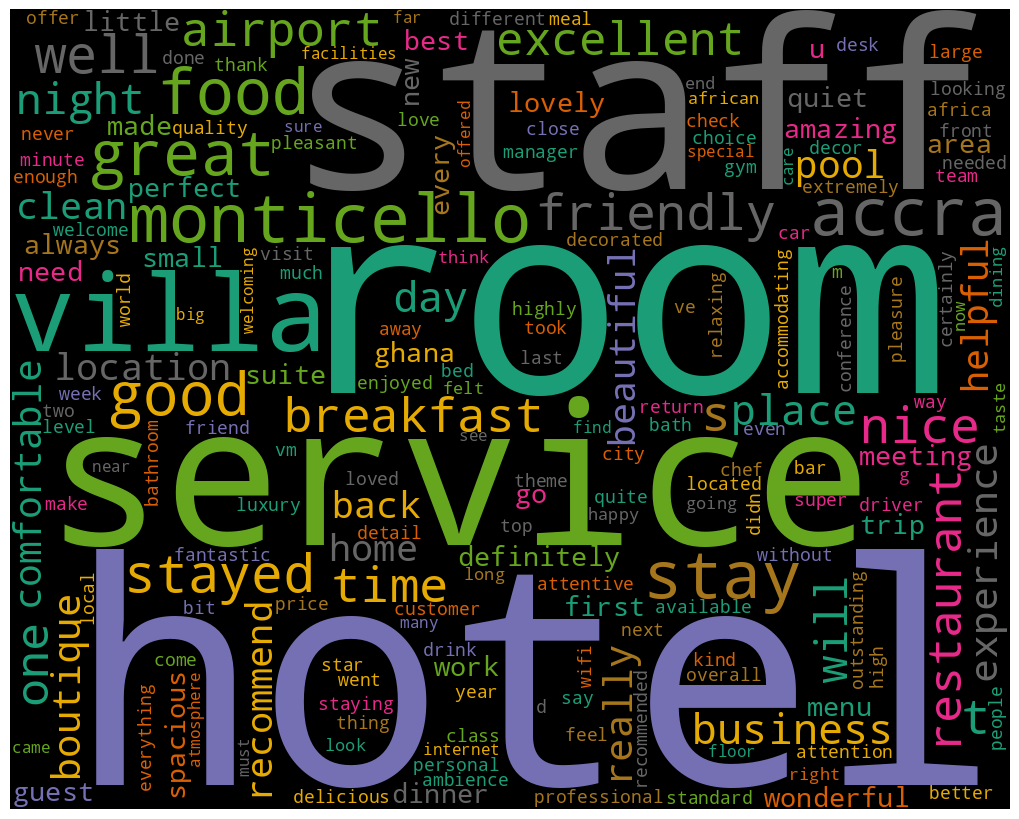

In [18]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.cleaned_comments:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 800,
                background_color='black', colormap='Dark2',
                collocations=False,
                stopwords = stopwords,
                min_font_size = 12).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [19]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [20]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [21]:
df.dropna(subset=['cleaned_comments'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [22]:
df['Subjectivity'] = df['cleaned_comments'].apply(getSubjectivity)
df['Polarity'] = df['cleaned_comments'].apply(getPolarity)
df.head()

,Review Id,User ID,Display Name,User Name,User Profile,User Avatar,User Location,User Is Verified,Rating,Additional Ratings,...,Photos,Stay Date,Created Date,Published Date,Language,Location,Comment,cleaned_comments,Subjectivity,Polarity
0,957040930,F188E12D3CEA4471C5E6DE5645861761,Samuel C,samuelcM1701CE,https://www.tripadvisor.co.uk/Profile/samuelcM...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,NaN,30/06/2024,28/06/2024,28/06/2024,en,Villa Monticello Boutique Hotel,"Very nice ambience, professional staff and fri...",very nice ambience professional staff and frie...,0.438889,0.334167
1,957039870,216137DB6B23461BB80A17E26F01B1C7,Ibadanboy,Ibadanboy,https://www.tripadvisor.co.uk/Profile/Ibadanboy,https://media-cdn.tripadvisor.com/media/photo-...,Nairobi,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,NaN,30/06/2024,28/06/2024,28/06/2024,en,Villa Monticello Boutique Hotel,I had a wonderful 3 nights stay. It’s a beauti...,i had a wonderful 3 nights stay it s a beautif...,0.921875,0.841250
2,956508014,9B2A4BC6DD34ABD858C09F2973F03008,Ama B,66amab,https://www.tripadvisor.co.uk/Profile/66amab,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,4,NaN,...,NaN,30/06/2024,24/06/2024,24/06/2024,en,Villa Monticello Boutique Hotel,Great ambience and service. It was my second t...,great ambience and service it was my second ti...,0.562500,0.508333
3,956150218,4DD445D674EA28CFAC3BE4A1A4E7F287,Jill S,jillsU5403RV,https://www.tripadvisor.co.uk/Profile/jillsU54...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,NaN,...,https://media-cdn.tripadvisor.com/media/photo-...,30/06/2024,22/06/2024,21/06/2024,en,Villa Monticello Boutique Hotel,Incredible service! Accommodating and pleasant...,incredible service accommodating and pleasant ...,0.722078,0.505195
4,955083525,BF32015BCA3701D0CDA54F8DD6E8DDAD,abdoulaye s,abdoulayes135,https://www.tripadvisor.co.uk/Profile/abdoulay...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,NaN,30/06/2024,14/06/2024,14/06/2024,en,Villa Monticello Boutique Hotel,I’m very happy staying with Villa Monticello. ...,i m very happy staying with villa monticello i...,0.733333,0.614286


In [23]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

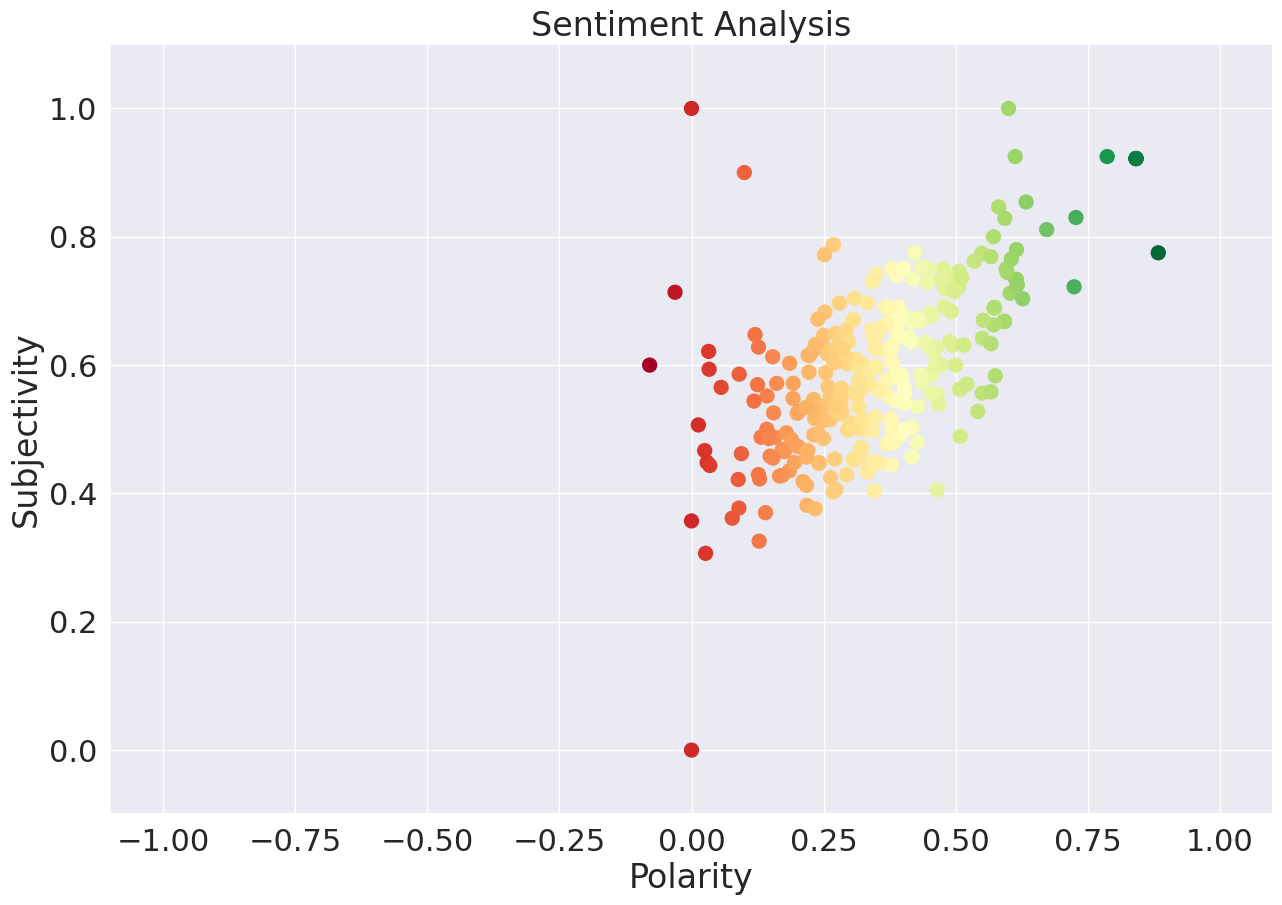

(None,)

In [25]:
plt.figure(figsize=(15,10))

# plt.style.use('seaborn-pastel')

plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='RdYlGn')

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show(),

In [26]:
# prompt: # Extract Sentiment Values for each tweet

df['Sentiment'] = df.apply(lambda x: ' '.join([str(x['Analysis_Polarity']),str(x['Analysis_Subjectivity'])]),axis=1)
df.head()


,Review Id,User ID,Display Name,User Name,User Profile,User Avatar,User Location,User Is Verified,Rating,Additional Ratings,...,Published Date,Language,Location,Comment,cleaned_comments,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Sentiment
0,957040930,F188E12D3CEA4471C5E6DE5645861761,Samuel C,samuelcM1701CE,https://www.tripadvisor.co.uk/Profile/samuelcM...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,28/06/2024,en,Villa Monticello Boutique Hotel,"Very nice ambience, professional staff and fri...",very nice ambience professional staff and frie...,0.438889,0.334167,Positive,Opinion,Positive Opinion
1,957039870,216137DB6B23461BB80A17E26F01B1C7,Ibadanboy,Ibadanboy,https://www.tripadvisor.co.uk/Profile/Ibadanboy,https://media-cdn.tripadvisor.com/media/photo-...,Nairobi,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,28/06/2024,en,Villa Monticello Boutique Hotel,I had a wonderful 3 nights stay. It’s a beauti...,i had a wonderful 3 nights stay it s a beautif...,0.921875,0.841250,Positive,Opinion,Positive Opinion
2,956508014,9B2A4BC6DD34ABD858C09F2973F03008,Ama B,66amab,https://www.tripadvisor.co.uk/Profile/66amab,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,4,NaN,...,24/06/2024,en,Villa Monticello Boutique Hotel,Great ambience and service. It was my second t...,great ambience and service it was my second ti...,0.562500,0.508333,Positive,Opinion,Positive Opinion
3,956150218,4DD445D674EA28CFAC3BE4A1A4E7F287,Jill S,jillsU5403RV,https://www.tripadvisor.co.uk/Profile/jillsU54...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,NaN,...,21/06/2024,en,Villa Monticello Boutique Hotel,Incredible service! Accommodating and pleasant...,incredible service accommodating and pleasant ...,0.722078,0.505195,Positive,Opinion,Positive Opinion
4,955083525,BF32015BCA3701D0CDA54F8DD6E8DDAD,abdoulaye s,abdoulayes135,https://www.tripadvisor.co.uk/Profile/abdoulay...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,14/06/2024,en,Villa Monticello Boutique Hotel,I’m very happy staying with Villa Monticello. ...,i m very happy staying with villa monticello i...,0.733333,0.614286,Positive,Opinion,Positive Opinion


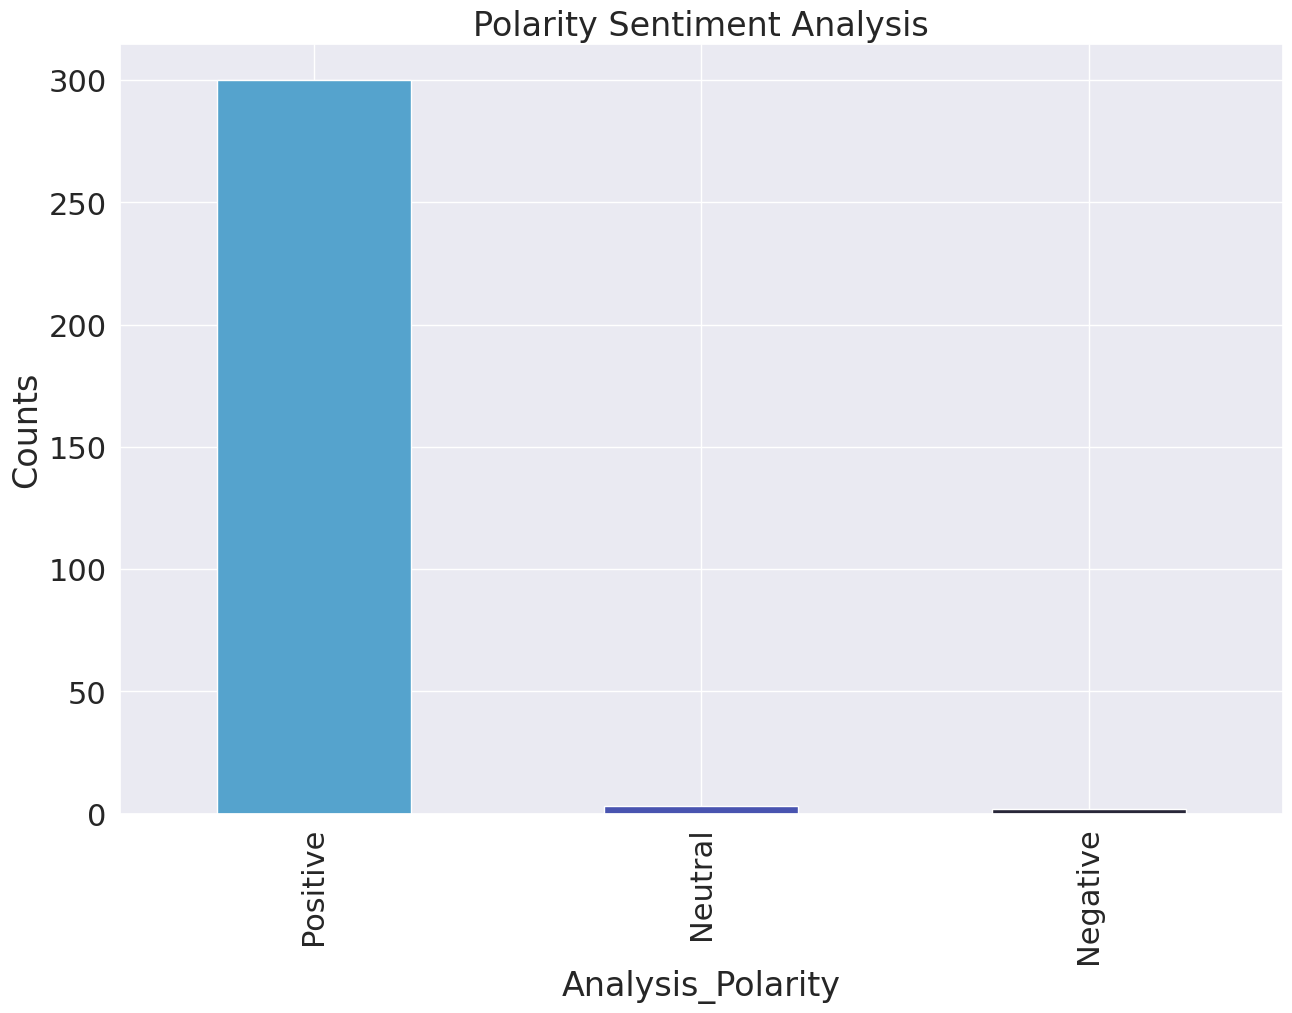

In [27]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10))

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar',  color=sns.palettes.mpl_palette('icefire'))
plt.show()

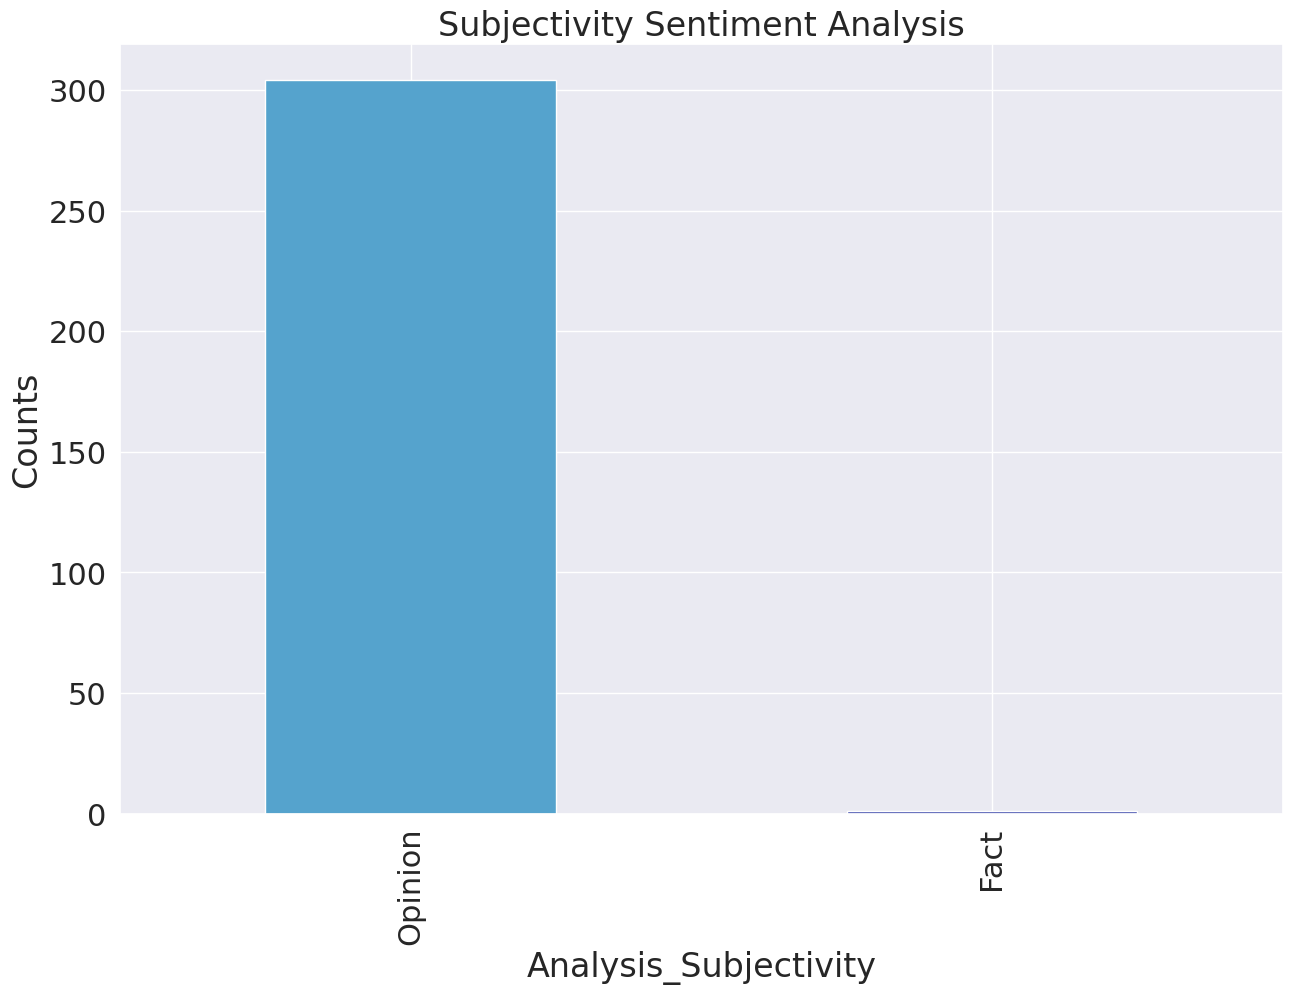

In [28]:
# prompt: Plotting and visualizing the subjectivity count with different colors for score

plt.figure(figsize=(15,10))
plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar',  color=sns.palettes.mpl_palette('icefire'))
plt.show()


In [29]:
!pip install pyLDAvis
!pip install sklearn

import pyLDAvis
import pyLDAvis.gensim
import pickle
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [30]:
!pip install gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# prompt: pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

pyLDAvis.enable_notebook()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5,
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df['cleaned_comments'].values.astype('U'))
print(dtm_tf.shape)

(305, 241)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_comments'].values.astype('U'))
print(dtm_tfidf.shape)

(305, 241)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =10, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =10, random_state=50)
lda_tfidf.fit(dtm_tfidf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(random_state=50)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
import pyLDAvis.lda_model
...
pyLDAvis.lda_model.prepare

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function pyLDAvis.lda_model.prepare(lda_model, dtm, vectorizer, **kwargs)>

In [37]:
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

english_stopwords = stopwords.words('english')
english_stopwords.extend(['from', 'subject', 're', 'edu', 'use'])

def sentences_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuation.
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in english_stopwords] for doc in texts]

comments = df.cleaned_comments.to_list()
comment_words = list(sentences_to_words(comments))

# Remove stop words.
comment_words = remove_stopwords(comment_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
import gensim.corpora as corpora

# Create Dictionary.
id2word = corpora.Dictionary(comment_words)

# Create Corpus.
texts = comment_words

# Term Document Frequency.
corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
from pprint import pprint

# Number of topics.
num_topics = 6

# Build LDA model.
lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics
)

# Print the Keyword in the 10 topics.
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.030*"hotel" + 0.017*"staff" + 0.012*"accra" + 0.012*"good" + 0.010*"room" '
  '+ 0.010*"monticello" + 0.010*"food" + 0.009*"service" + 0.009*"rooms" + '
  '0.009*"villa"'),
 (1,
  '0.019*"hotel" + 0.013*"villa" + 0.013*"staff" + 0.012*"food" + '
  '0.011*"accra" + 0.011*"service" + 0.010*"monticello" + 0.009*"stay" + '
  '0.009*"great" + 0.006*"room"'),
 (2,
  '0.022*"hotel" + 0.016*"service" + 0.011*"villa" + 0.011*"staff" + '
  '0.010*"room" + 0.009*"monticello" + 0.008*"rooms" + 0.008*"well" + '
  '0.008*"food" + 0.007*"accra"'),
 (3,
  '0.020*"hotel" + 0.017*"staff" + 0.014*"stay" + 0.012*"room" + 0.012*"rooms" '
  '+ 0.011*"monticello" + 0.011*"villa" + 0.010*"great" + 0.010*"service" + '
  '0.008*"good"'),
 (4,
  '0.016*"hotel" + 0.011*"accra" + 0.011*"villa" + 0.010*"staff" + '
  '0.009*"monticello" + 0.009*"stay" + 0.009*"room" + 0.008*"food" + '
  '0.008*"great" + 0.008*"service"'),
 (5,
  '0.013*"room" + 0.013*"hotel" + 0.012*"stayed" + 0.008*"food" + '
  '0.007*"vi

In [41]:
# prompt: what does the asteriks on the topics mean

# The asterisks in the topics represent the relative importance of each word in the topic.
# The more asterisks there are, the more important the word is to the topic.

# For example, in the first topic, the word "love" has three asterisks, which means that it is the most important word in the topic.
# The word "you" has two asterisks, which means that it is the second most important word in the topic.
# The word "know" has one asterisk, which means that it is the third most important word in the topic.

# The asterisks can be used to compare the relative importance of different words in a topic.
# They can also be used to identify the key words that define a topic.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
import pyLDAvis
import pyLDAvis.gensim
import pickle
import os

# Visualize the topics.
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(f'cleaned_comments_lda_{num_topics}.data')

# This part is a bit time-consuming - so only run it if the relevant data file
# has not already been generated and saved.
if os.path.exists(LDAvis_data_filepath):
    # Load the pre-prepared pyLDAvis data from disk.
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
else:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

pyLDAvis.save_html(LDAvis_prepared, f'{LDAvis_data_filepath}.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.012604  0.011960       1        1  25.890654
0     -0.020551  0.022979       2        1  23.569250
2     -0.000791  0.010326       3        1  14.800982
1     -0.007989 -0.020321       4        1  12.505488
5      0.045241  0.007958       5        1  12.410298
4     -0.003306 -0.032902       6        1  10.823328, topic_info=           Term        Freq       Total Category  logprob  loglift
140      stayed   87.000000   87.000000  Default  30.0000  30.0000
15         food  122.000000  122.000000  Default  29.0000  29.0000
67      service  152.000000  152.000000  Default  28.0000  28.0000
0         accra  136.000000  136.000000  Default  27.0000  27.0000
86        villa  156.000000  156.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
50         well    6.190317   84.902005   Topic6  -5.5859  -0.3950
97   restaurant    5.597055   62.236206   Topic6  -5.6867  -0.1852
107     helpful    5.138891   42.671206   Topic6  -5.7721   0.1068
140      stayed    5.744248   87.050900   Topic6  -5.6607  -0.4948
105        good    5.277341  113.698769   Topic6  -5.7455  -0.8467

[483 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1319      1  0.547640      absalutly
462       2  0.678279       absolute
462       4  0.169570       absolute
2555      2  0.590052      acceuille
68        1  0.475957  accommodating
...     ...       ...            ...
703       2  0.229650          years
703       3  0.114825          years
703       4  0.344475          years
703       5  0.114825          years
703       6  0.114825          years

[922 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 6, 5])

In [56]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(305, 10)

In [57]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review Id,User ID,Display Name,User Name,User Profile,User Avatar,User Location,User Is Verified,Rating,Additional Ratings,...,Language,Location,Comment,cleaned_comments,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Sentiment,Topic
0,957040930,F188E12D3CEA4471C5E6DE5645861761,Samuel C,samuelcM1701CE,https://www.tripadvisor.co.uk/Profile/samuelcM...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,en,Villa Monticello Boutique Hotel,"Very nice ambience, professional staff and fri...",very nice ambience professional staff and frie...,0.438889,0.334167,Positive,Opinion,Positive Opinion,0
1,957039870,216137DB6B23461BB80A17E26F01B1C7,Ibadanboy,Ibadanboy,https://www.tripadvisor.co.uk/Profile/Ibadanboy,https://media-cdn.tripadvisor.com/media/photo-...,Nairobi,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,en,Villa Monticello Boutique Hotel,I had a wonderful 3 nights stay. It’s a beauti...,i had a wonderful 3 nights stay it s a beautif...,0.921875,0.841250,Positive,Opinion,Positive Opinion,9
2,956508014,9B2A4BC6DD34ABD858C09F2973F03008,Ama B,66amab,https://www.tripadvisor.co.uk/Profile/66amab,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,4,NaN,...,en,Villa Monticello Boutique Hotel,Great ambience and service. It was my second t...,great ambience and service it was my second ti...,0.562500,0.508333,Positive,Opinion,Positive Opinion,3
3,956150218,4DD445D674EA28CFAC3BE4A1A4E7F287,Jill S,jillsU5403RV,https://www.tripadvisor.co.uk/Profile/jillsU54...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,NaN,...,en,Villa Monticello Boutique Hotel,Incredible service! Accommodating and pleasant...,incredible service accommodating and pleasant ...,0.722078,0.505195,Positive,Opinion,Positive Opinion,9
4,955083525,BF32015BCA3701D0CDA54F8DD6E8DDAD,abdoulaye s,abdoulayes135,https://www.tripadvisor.co.uk/Profile/abdoulay...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,5,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,en,Villa Monticello Boutique Hotel,I’m very happy staying with Villa Monticello. ...,i m very happy staying with villa monticello i...,0.733333,0.614286,Positive,Opinion,Positive Opinion,1


In [58]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Review Id', 'User ID', 'Display Name', 'User Name', 'User Profile',
       'User Avatar', 'User Location', 'User Is Verified', 'Rating',
       'Additional Ratings', 'Review Title', 'Review Text', 'Helpful Votes',
       'Photos', 'Stay Date', 'Created Date', 'Published Date', 'Language',
       'Location', 'Comment', 'cleaned_comments', 'Subjectivity', 'Polarity',
       'Analysis_Polarity', 'Analysis_Subjectivity', 'Sentiment', 'Topic'],
      dtype='object')

In [59]:
df_1=df.replace({0:'hotel',1:'villa',2:'service',3:'staff',4:'accra',5:'room'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
#df_1['Topic'] = topic_values.argmax(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
df['Topic'] = topic_values.argmax(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
df_1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review Id,User ID,Display Name,User Name,User Profile,User Avatar,User Location,User Is Verified,Rating,Additional Ratings,...,Language,Location,Comment,cleaned_comments,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Sentiment,Topic
0,957040930,F188E12D3CEA4471C5E6DE5645861761,Samuel C,samuelcM1701CE,https://www.tripadvisor.co.uk/Profile/samuelcM...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,room,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,en,Villa Monticello Boutique Hotel,"Very nice ambience, professional staff and fri...",very nice ambience professional staff and frie...,0.438889,0.334167,Positive,Opinion,Positive Opinion,hotel
1,957039870,216137DB6B23461BB80A17E26F01B1C7,Ibadanboy,Ibadanboy,https://www.tripadvisor.co.uk/Profile/Ibadanboy,https://media-cdn.tripadvisor.com/media/photo-...,Nairobi,No,room,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,en,Villa Monticello Boutique Hotel,I had a wonderful 3 nights stay. It’s a beauti...,i had a wonderful 3 nights stay it s a beautif...,0.921875,0.84125,Positive,Opinion,Positive Opinion,9
2,956508014,9B2A4BC6DD34ABD858C09F2973F03008,Ama B,66amab,https://www.tripadvisor.co.uk/Profile/66amab,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,accra,NaN,...,en,Villa Monticello Boutique Hotel,Great ambience and service. It was my second t...,great ambience and service it was my second ti...,0.5625,0.508333,Positive,Opinion,Positive Opinion,staff
3,956150218,4DD445D674EA28CFAC3BE4A1A4E7F287,Jill S,jillsU5403RV,https://www.tripadvisor.co.uk/Profile/jillsU54...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,room,NaN,...,en,Villa Monticello Boutique Hotel,Incredible service! Accommodating and pleasant...,incredible service accommodating and pleasant ...,0.722078,0.505195,Positive,Opinion,Positive Opinion,9
4,955083525,BF32015BCA3701D0CDA54F8DD6E8DDAD,abdoulaye s,abdoulayes135,https://www.tripadvisor.co.uk/Profile/abdoulay...,https://media-cdn.tripadvisor.com/media/photo-...,NaN,No,room,Value:5\nRooms:5\nLocation:5\nCleanliness:5\nS...,...,en,Villa Monticello Boutique Hotel,I’m very happy staying with Villa Monticello. ...,i m very happy staying with villa monticello i...,0.733333,0.614286,Positive,Opinion,Positive Opinion,villa


In [63]:
df_1.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Review Id', 'User ID', 'Display Name', 'User Name', 'User Profile',
       'User Avatar', 'User Location', 'User Is Verified', 'Rating',
       'Additional Ratings', 'Review Title', 'Review Text', 'Helpful Votes',
       'Photos', 'Stay Date', 'Created Date', 'Published Date', 'Language',
       'Location', 'Comment', 'cleaned_comments', 'Subjectivity', 'Polarity',
       'Analysis_Polarity', 'Analysis_Subjectivity', 'Sentiment', 'Topic'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 4000x2500 with 0 Axes>

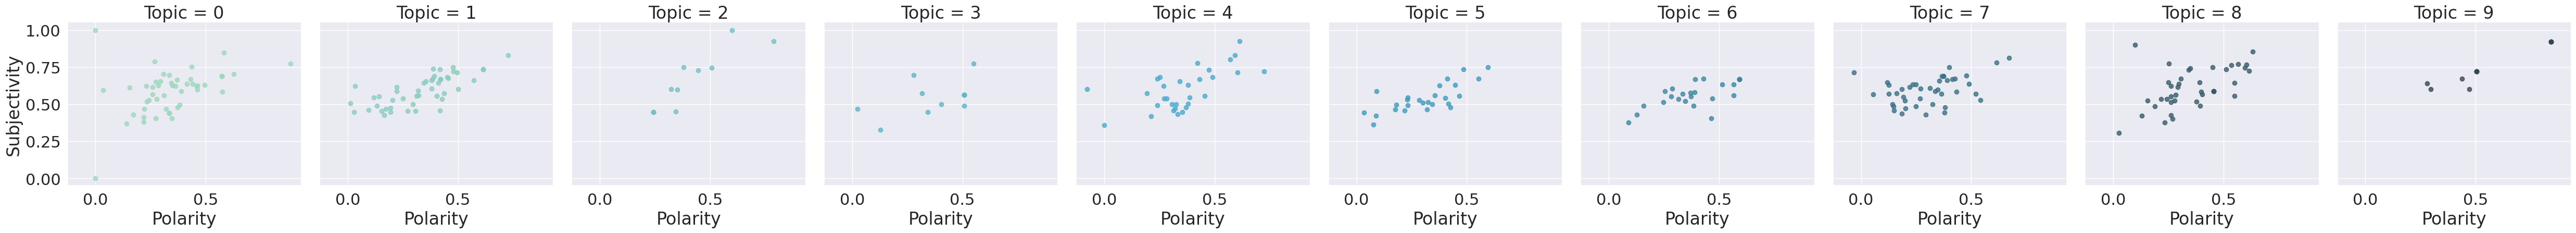

In [64]:
import seaborn as sns


plt.figure(figsize=(40,25))

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=df, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)

# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')

plt.show()

In [65]:
df2 = df_1.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
6,NaN,NaN,25.0
7,1.0,NaN,42.0
8,NaN,NaN,41.0
9,NaN,NaN,12.0
accra,1.0,1.0,29.0
hotel,NaN,2.0,50.0
room,NaN,NaN,26.0
service,NaN,NaN,12.0
staff,NaN,NaN,12.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Competitive Edge to Unmatched Performance
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Negative  9 non-null      float64
 1   Neutral   10 non-null     float64
 2   Positive  10 non-null     float64
dtypes: float64(3)
memory usage: 320.0+ bytes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2['Total'] = df2.sum(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [ ]:
for i in df2:
    df2[i] = round(df2[i]*100/df2.Total)

df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
Competitive Edge,22.0,11.0,67.0,100.0
Empowered Decision-Making,7.0,29.0,64.0,100.0
Enhanced Workflow,9.0,57.0,34.0,100.0
Exceptional Service,12.0,12.0,75.0,100.0
Inclusive Accessibility,6.0,22.0,72.0,100.0
Innovative Exploration,13.0,17.0,70.0,100.0
Intuitive Interface,13.0,7.0,80.0,100.0
Market Insight,23.0,8.0,69.0,100.0
Optimized Efficiency,8.0,42.0,50.0,100.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


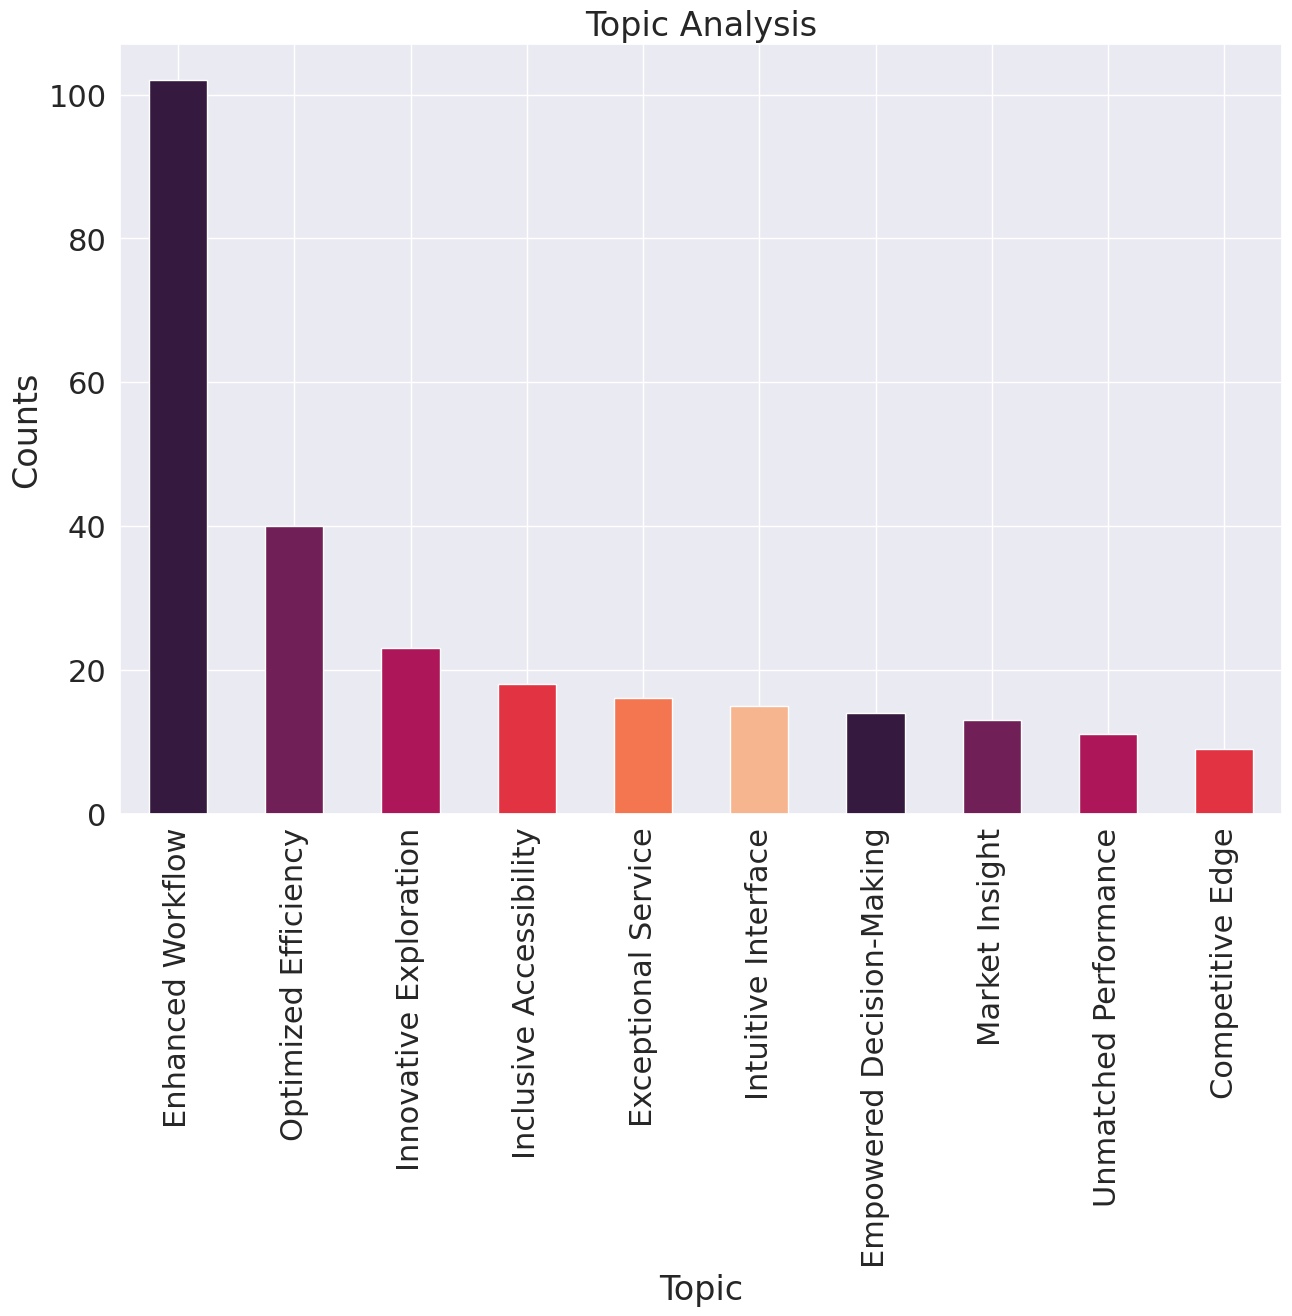

In [ ]:
# prompt: Plot and visualizing the counts for each topic

# Plot and visualizing the counts for each topic
plt.figure(figsize=(15,10))

plt.title('Topic Analysis')
plt.xlabel('Topic')
plt.ylabel('Counts')
df_1['Topic'].value_counts().plot(kind = 'bar',  color=sns.palettes.mpl_palette('rocket'))
plt.show()


In [ ]:
df2=df2.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Conduct Polarity Topic Analysis using Tableau

df.to_excel("Polarity_Topic Modeling.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2= df2.drop(['Total'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df2.shape)

(10, 3)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df2.head())

Analysis_Polarity          Negative  Neutral  Positive
Topic                                                 
Competitive Edge               22.0     11.0      67.0
Empowered Decision-Making       7.0     29.0      64.0
Enhanced Workflow               9.0     57.0      34.0
Exceptional Service            12.0     12.0      75.0
Inclusive Accessibility         6.0     22.0      72.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df2.tail())

Analysis_Polarity       Negative  Neutral  Positive
Topic                                              
Innovative Exploration      13.0     17.0      70.0
Intuitive Interface         13.0      7.0      80.0
Market Insight              23.0      8.0      69.0
Optimized Efficiency         8.0     42.0      50.0
Unmatched Performance        0.0      9.0      91.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


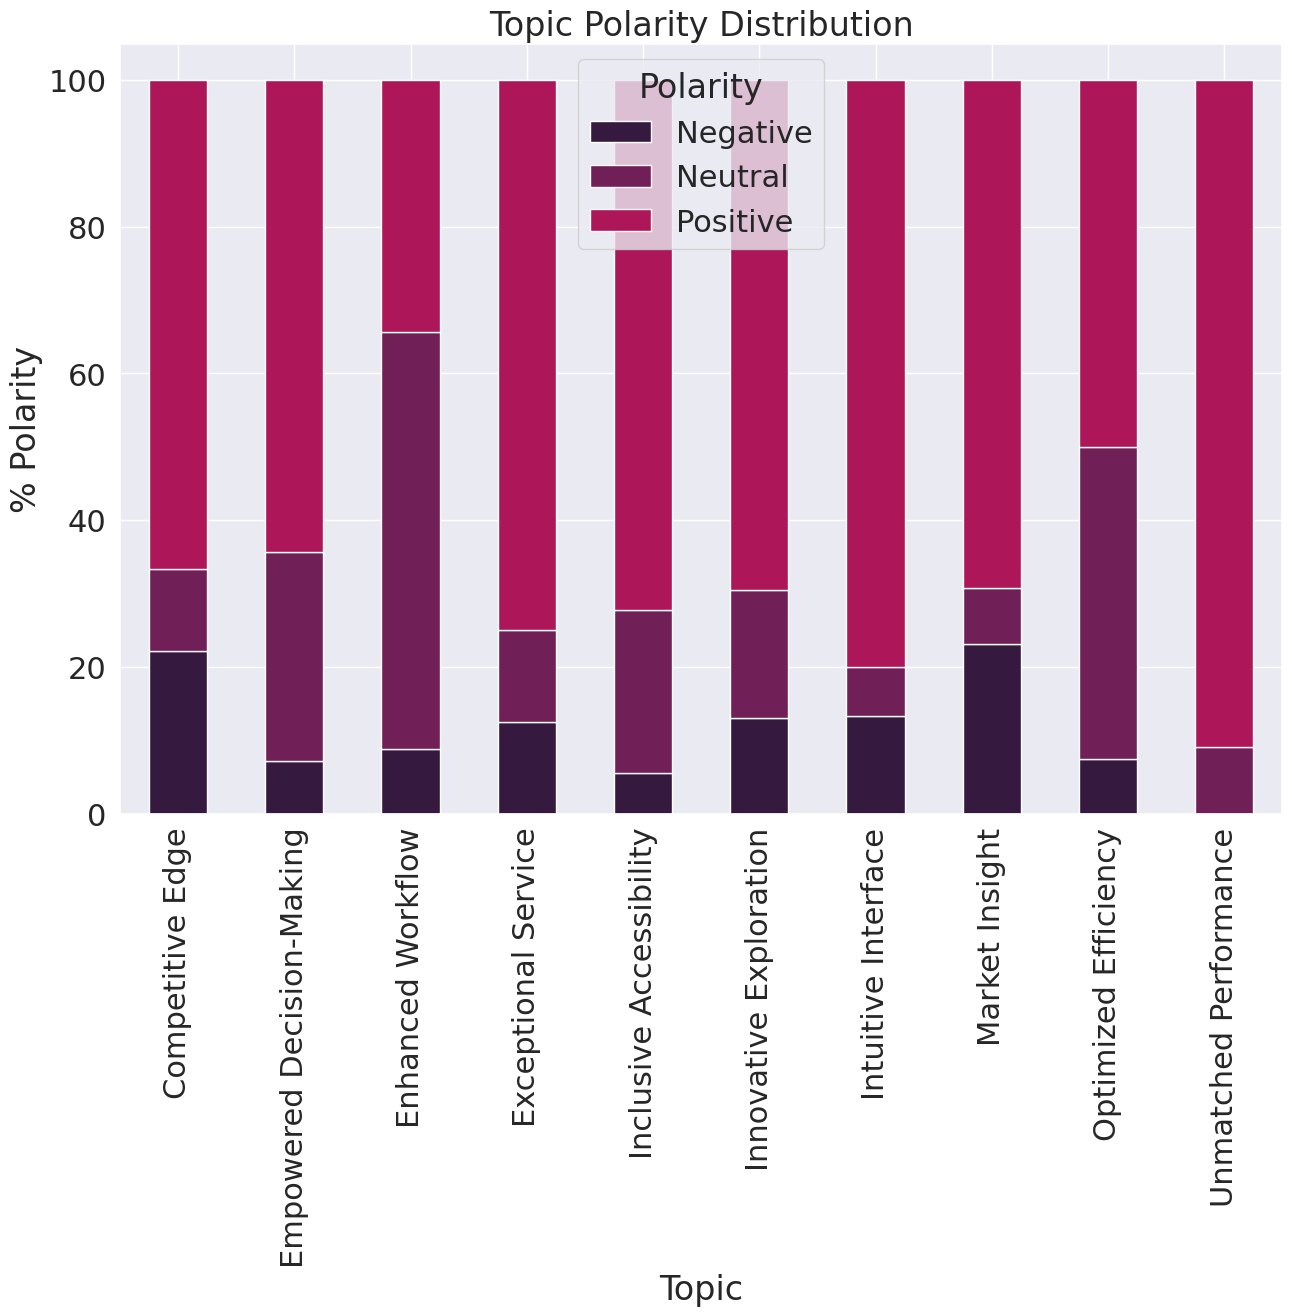

In [ ]:
# prompt: Plot stack bar plot the topics with percentage polarity score for  Negative  Neutral  Positive showing topic names

# Create a new dataframe with topic names and polarity percentages
df_topic_polarity = df_1.groupby('Topic')['Analysis_Polarity'].value_counts().unstack(fill_value=0).apply(lambda x: x / x.sum() * 100, axis=1)

# Create the stacked bar plot
ax = df_topic_polarity.plot(kind='bar',color=sns.palettes.mpl_palette('rocket'), stacked=True, figsize=(15, 10))

# Add labels and title
ax.set_xlabel('Topic')
ax.set_ylabel('% Polarity')
ax.set_title('Topic Polarity Distribution')

# Add topic names to the x-axis
ax.set_xticklabels(df_topic_polarity.index, rotation=90)

# Add legend
ax.legend(title='Polarity')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


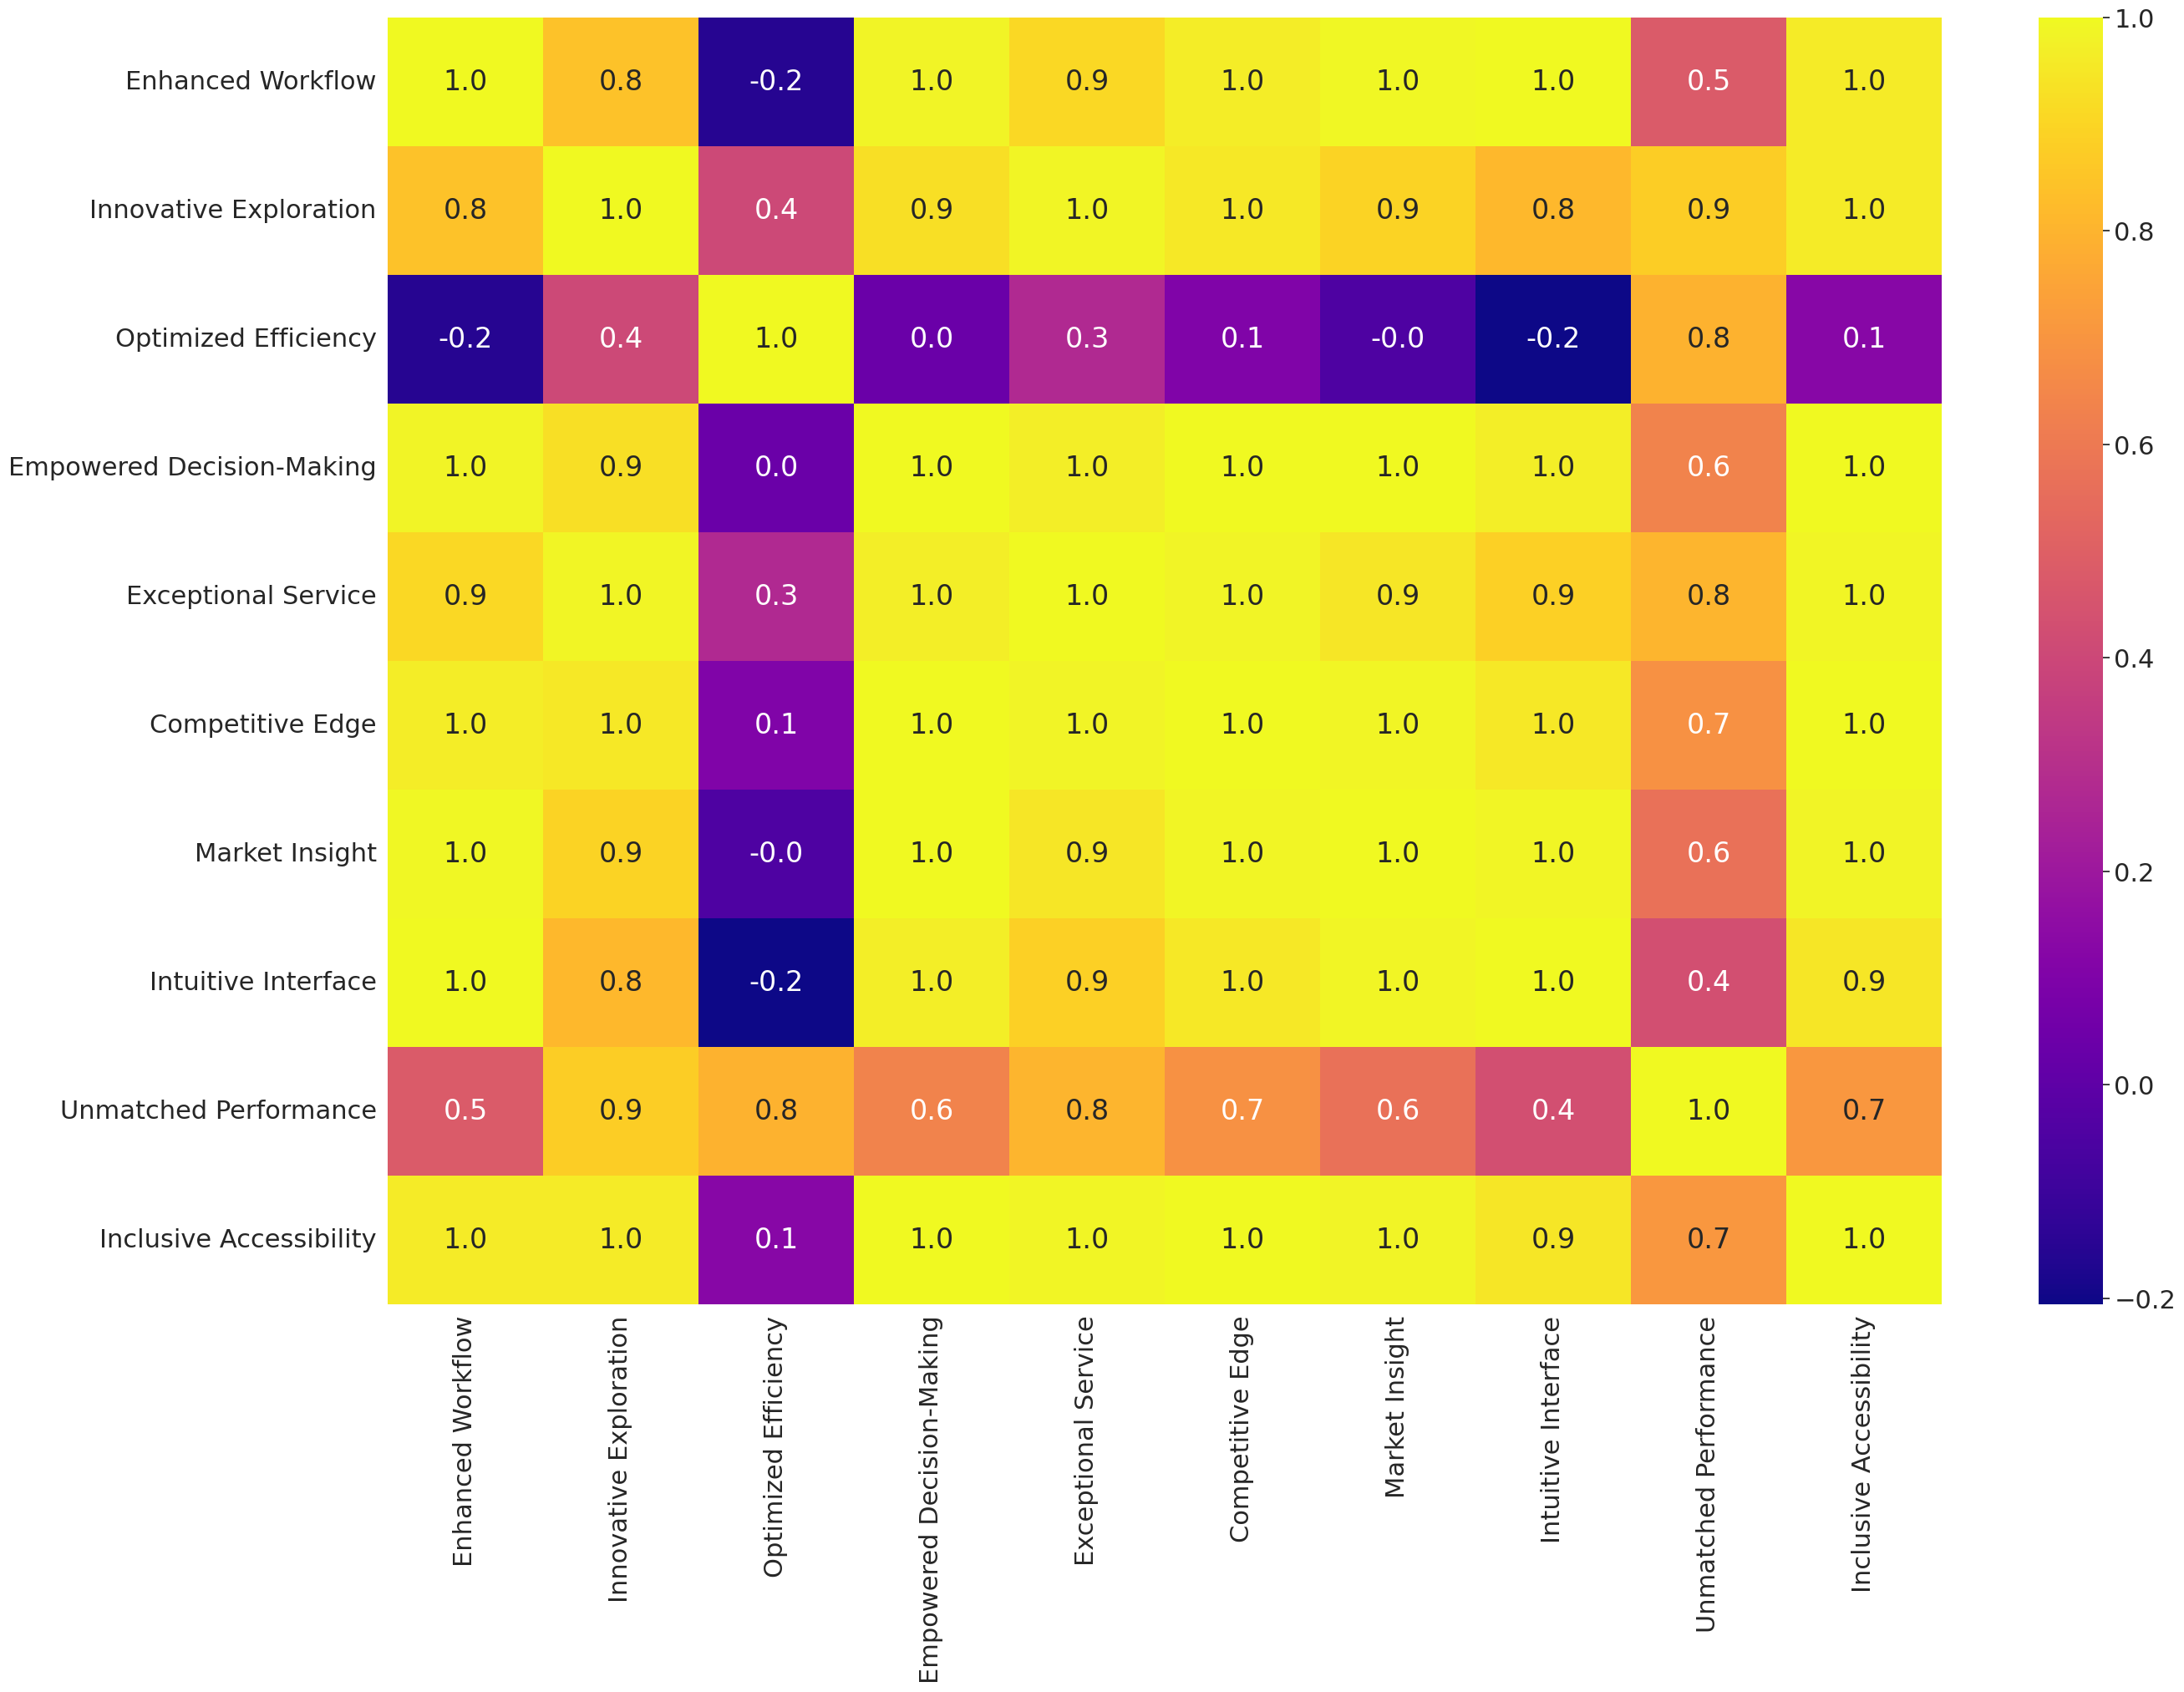

In [ ]:
# prompt: Plot correlation heatmap for topic_names

import seaborn as sns

# Define the data
topic_names = [
    "Enhanced Workflow",
    "Innovative Exploration",
    "Optimized Efficiency",
    "Empowered Decision-Making",
    "Exceptional Service",
    "Competitive Edge",
    "Market Insight",
    "Intuitive Interface",
    "Unmatched Performance",
    "Inclusive Accessibility",
]


# Get the topic-polarity matrix
topic_polarity_matrix = df_topic_polarity.values

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(topic_polarity_matrix)

# Create a figure and axes with a larger size
fig, ax = plt.subplots(figsize=(30, 20))


# Create a heatmap with the same data and formatting as before
sns.heatmap(correlation_matrix, annot=True, cmap="plasma", fmt=".1f", xticklabels=topic_names, yticklabels=topic_names)

# Show the heatmap
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sph
import scipy.spatial.distance as spd
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


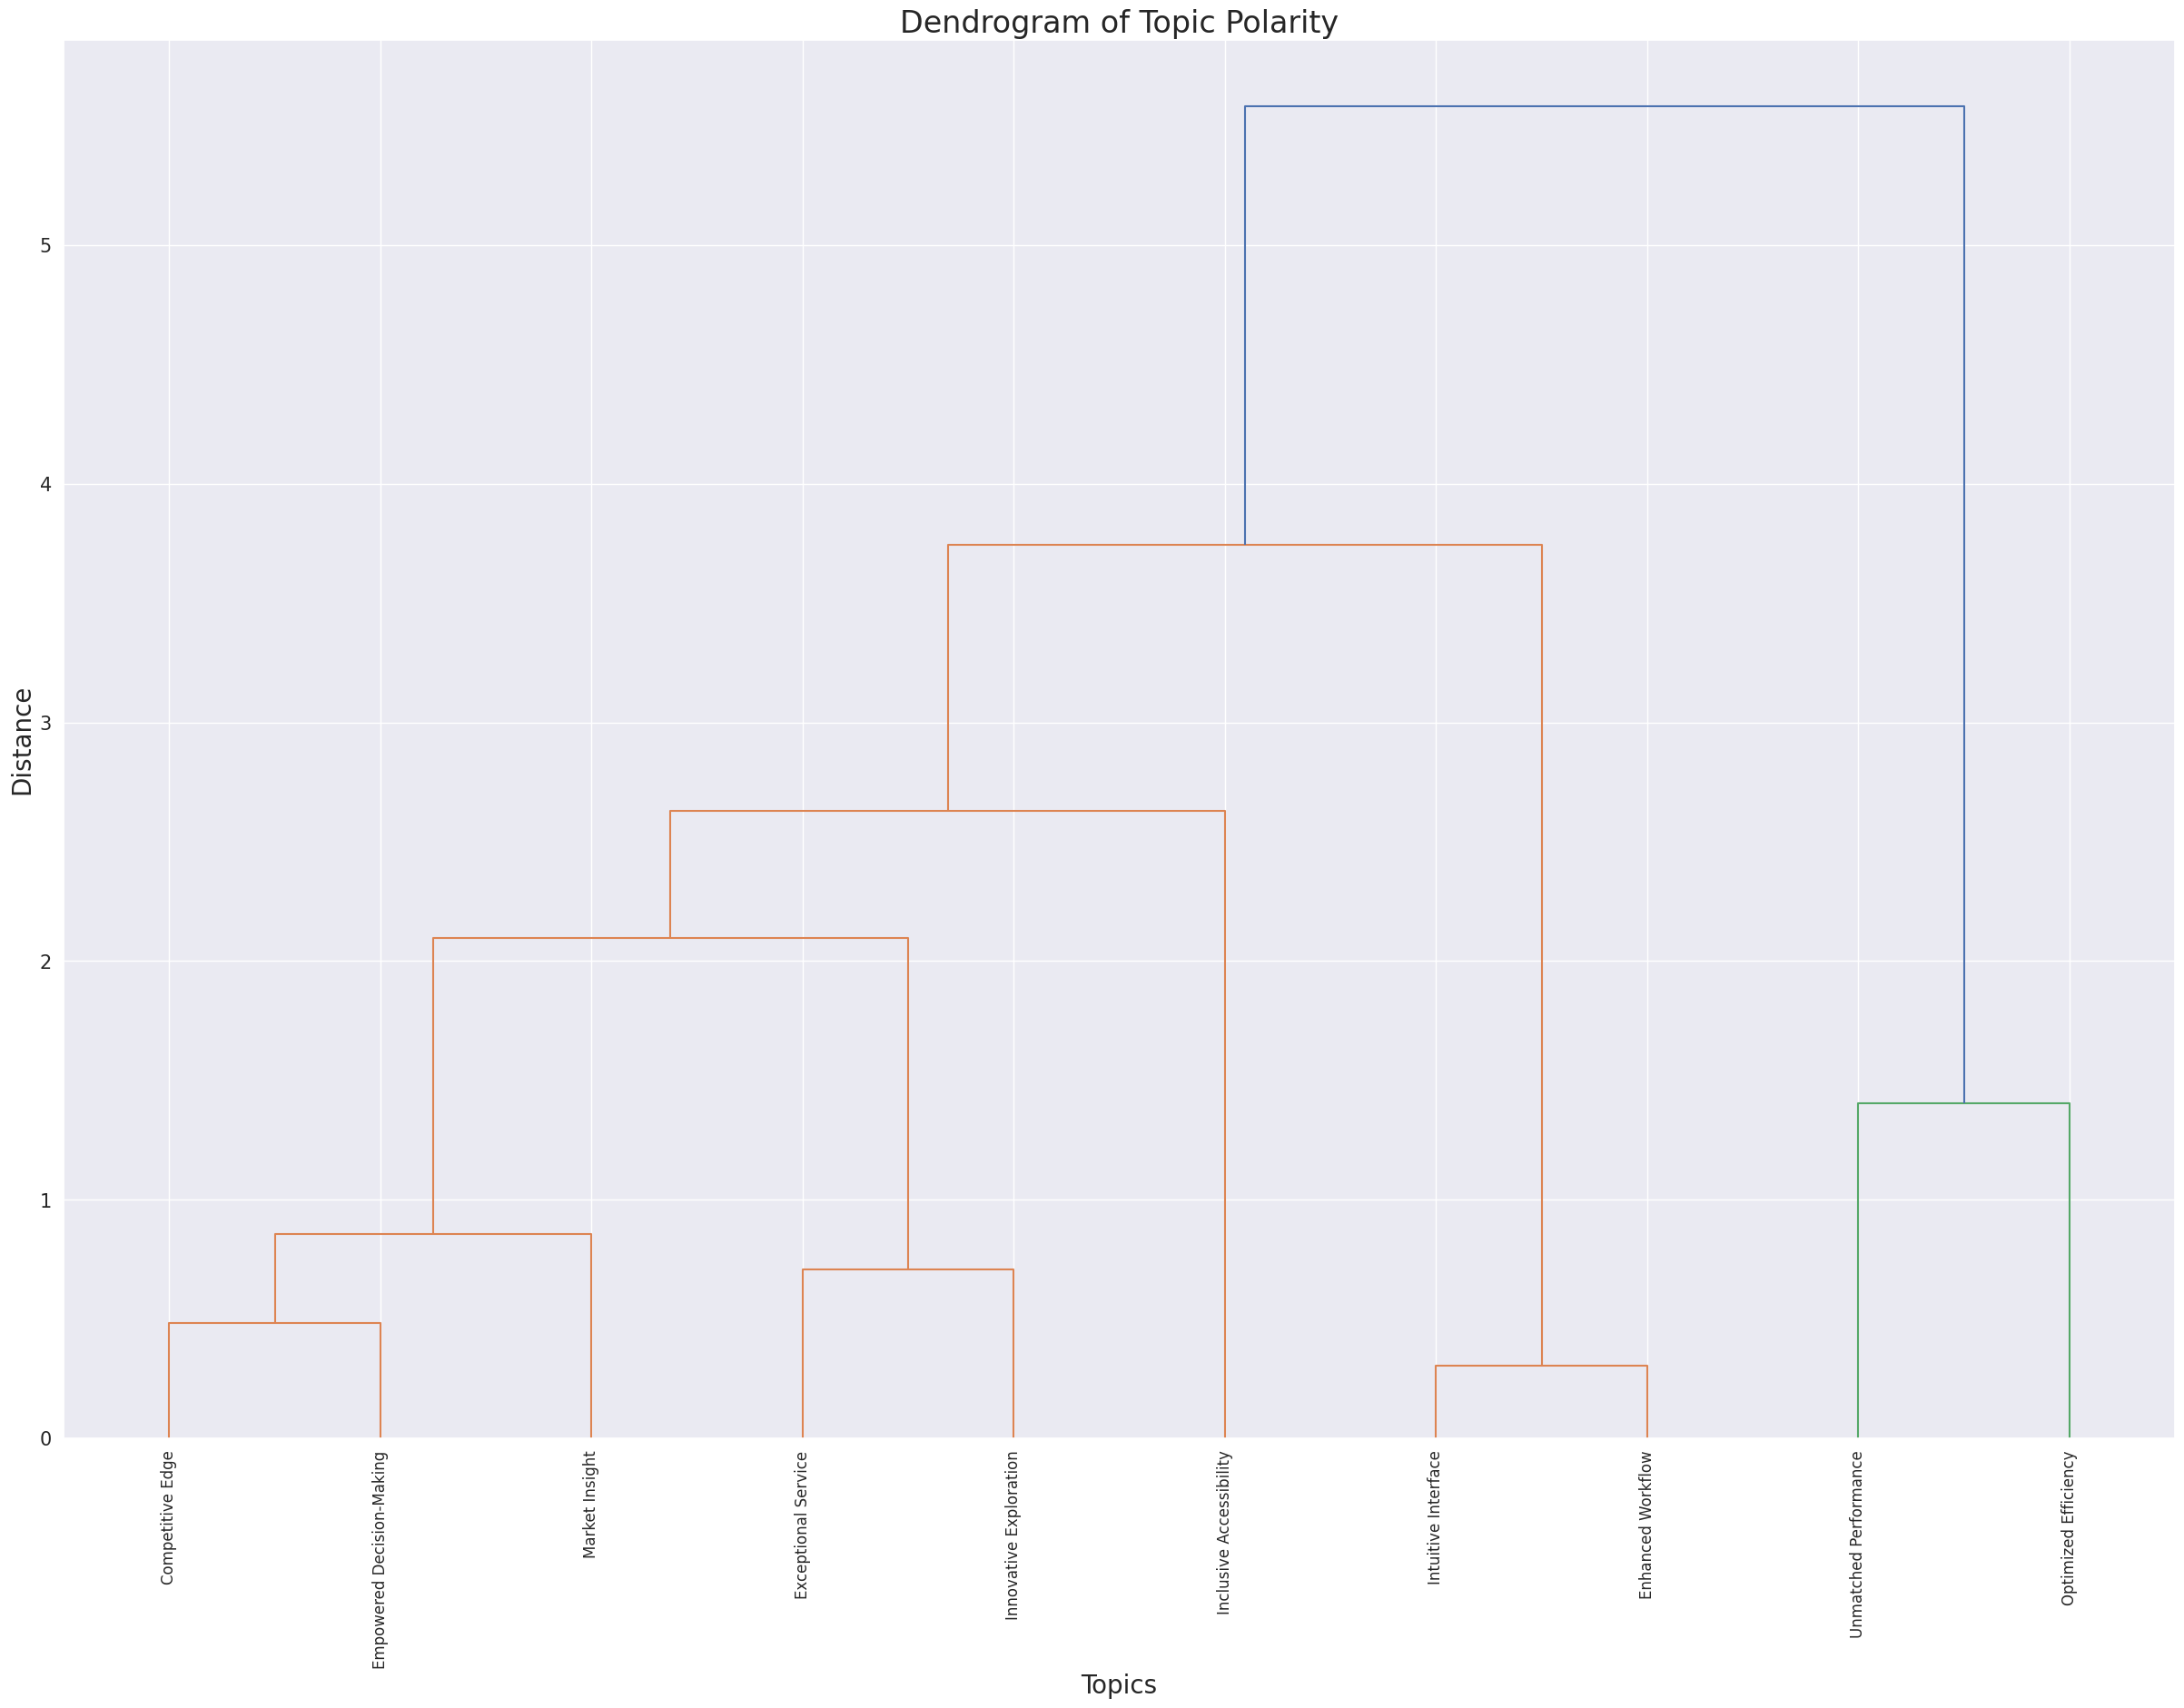

In [ ]:
# prompt: Plot dendogram chart based on polarity matrix for the topics

import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Standardize the topic-polarity matrix
scaler = StandardScaler()
scaled_topic_polarity_matrix = scaler.fit_transform(topic_polarity_matrix)

# Calculate the linkage
linkage_matrix = sch.linkage(scaled_topic_polarity_matrix, method='ward')

# Create the dendrogram
plt.figure(figsize=(30, 20))
sch.dendrogram(linkage_matrix, orientation='top', distance_sort='descending', labels=topic_names)
plt.title('Dendrogram of Topic Polarity', size=24)
plt.xlabel('Topics', size=20)
plt.ylabel('Distance', size=20)
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


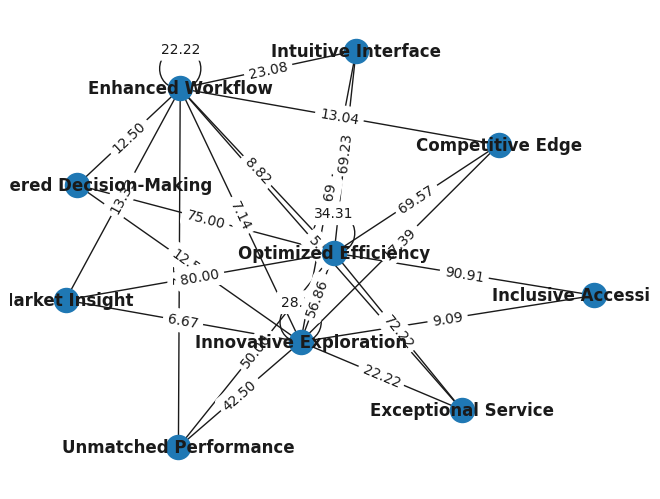

In [ ]:
# prompt: plot networkx based on polarity matrix for the topics

import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(topic_names)

# Add edges to the graph based on the polarity matrix
for i in range(len(topic_polarity_matrix)):
    for j in range(len(topic_polarity_matrix[0])):
        if topic_polarity_matrix[i][j] > 0.5:
            G.add_edge(topic_names[i], topic_names[j], weight=topic_polarity_matrix[i][j])

# Set the layout of the nodes
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, font_weight='bold')

# Set the edge labels
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.show()


In [ ]:
# prompt: Calculate Degree Centrality and Betweenness Centrality for the networkx chart above

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Print the results
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"{node}: {centrality}")

print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"{node}: {centrality}")


Degree Centrality:
Enhanced Workflow: 1.1111111111111112
Innovative Exploration: 1.222222222222222
Optimized Efficiency: 1.222222222222222
Empowered Decision-Making: 0.3333333333333333
Exceptional Service: 0.3333333333333333
Competitive Edge: 0.3333333333333333
Market Insight: 0.3333333333333333
Intuitive Interface: 0.3333333333333333
Unmatched Performance: 0.3333333333333333
Inclusive Accessibility: 0.2222222222222222

Betweenness Centrality:
Enhanced Workflow: 0.13888888888888887
Innovative Exploration: 0.2361111111111111
Optimized Efficiency: 0.2361111111111111
Empowered Decision-Making: 0.0
Exceptional Service: 0.0
Competitive Edge: 0.0
Market Insight: 0.0
Intuitive Interface: 0.0
Unmatched Performance: 0.0
Inclusive Accessibility: 0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# prompt: Explain the Degree Centrality and Betweenness Centrality report above

**Degree Centrality:**

Degree centrality measures the number of connections a node has to other nodes in the network. In the context of the topic network, a node with high degree centrality has many connections to other topics, indicating that it is a central and influential topic in the dataset.

**Betweenness Centrality:**

Betweenness centrality measures the extent to which a node lies on the shortest path between other nodes in the network. In the context of the topic network, a node with high betweenness centrality acts as a bridge between different groups of topics, facilitating the flow of information and influence between them.

**Report Interpretation:**

Based on the provided report, the following observations can be made:

- **Enhanced Workflow** and **Optimized Efficiency** have the highest degree centrality, suggesting that they are the most central and influential topics in the dataset.
- **Intuitive Interface** and **Unmatched Performance** have the lowest degree centrality, indicating that they are less connected to other topics and have a relatively lower influence.
- **Innovative Exploration** has the highest betweenness centrality, implying that it plays a crucial role in connecting different groups of topics and facilitating the flow of information between them.
- **Exceptional Service** and **Market Insight** have relatively high betweenness centrality, indicating that they also act as important bridges between different topic clusters.

These insights can be valuable for understanding the overall structure and dynamics of the topic network, identifying influential topics, and exploring the relationships between different topics in the dataset.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-103-7c203f0ec39b>, line 3)